In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

<h4>1. Carga del conjunto de datos</h4>

In [49]:
df = pd.read_csv('datasets/transformed_bankdataset.csv')

<h4>2. Exploración inicial del conjunto de datos</h4>

In [51]:
# Ver las primeras filas del dataframe
print(df.head())

# Información general sobre el dataframe
print(df.info())

    age         job  marital  education default  balance housing loan  \
0  59.0      admin.  married  secondary      no     2343     yes   no   
1  56.0      admin.  married  secondary      no       45      no   no   
2  41.0  technician  married  secondary      no     1270     yes   no   
3  55.0    services  married  secondary      no     2476     yes   no   
4  54.0      admin.  married   tertiary      no      184      no   no   

   contact  day  ... campaign  pdays  previous  poutcome  deposit balance_log  \
0  unknown    5  ...        1     -1         0   unknown      yes    9.126089   
1  unknown    5  ...        1     -1         0   unknown      yes    8.838407   
2  unknown    5  ...        1     -1         0   unknown      yes    9.001962   
3  unknown    5  ...        1     -1         0   unknown      yes    9.140454   
4  unknown    5  ...        2     -1         0   unknown      yes    8.858369   

  duration_log  campaign_log  pdays_log  previous_log  
0     6.950815    

<h4>3. División del conjunto de datos</h4>

In [53]:
# Separar las características y la variable objetivo
df = df.drop(columns=['balance', 'duration', 'campaign', 'pdays', 'previous'])# Seleccionamos solo las columnas transformadas (eliminando outliers)

X = df.drop(columns='deposit')
y = df['deposit']

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Se utiliza una proporción de 70-30 para asegurar un conjunto de entrenamiento robusto y un conjunto de prueba que
# permita evaluar el rendimiento del modelo de manera efectiva. La división en estratos asegura que ambas partes
# tengan una representación similar de las clases en la variable objetivo.


<h4>4. Codificación de variables categóricas</h4>

In [55]:
# Codificación de variables categóricas utilizando one-hot encoding (cambiar los string por binarios)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar que ambas divisiones tengan las mismas columnas después de la codificación
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# One-hot encoding es adecuado aquí ya que transforma cada categoría en una nueva columna binaria,
# permitiendo que el modelo interprete cada categoría sin asumir un orden entre ellas.

<h4>5. Estandarización de variables numéricas</h4>

In [67]:
# Seleccionar las variables numéricas
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# La estandarización se utiliza para garantizar que todas las variables contribuyan de manera equitativa al modelo,
# especialmente para algoritmos que son sensibles a la escala de las variables, como KNN.

In [109]:
X_train.describe()

,age,day,balance_log,duration_log,campaign_log,pdays_log,previous_log
count,7.813000e+03,7.813000e+03,7.813000e+03,7.813000e+03,7.813000e+03,7.813000e+03,7.813000e+03
mean,-4.547182e-19,1.091324e-17,-1.818873e-18,-2.364535e-17,-1.546042e-17,-6.911717e-17,-1.955288e-17
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-1.947480e+00,-1.748463e+00,-3.305727e+01,-4.372030e+00,-8.091122e-01,-5.770501e-01,-4.995518e-01
25%,-7.675924e-01,-9.183904e-01,-5.711427e-01,-6.247222e-01,-8.091122e-01,-5.770501e-01,-4.995518e-01
50%,-1.776487e-01,3.026393e-02,-3.317009e-01,2.437213e-02,-5.819879e-02,-5.770501e-01,-4.995518e-01
75%,6.651281e-01,7.417546e-01,2.428714e-01,7.187716e-01,5.242549e-01,8.261148e-01,4.408155e-01
max,4.373346e+00,1.808991e+00,9.529503e+00,2.715739e+00,7.219336e+00,2.404192e+00,7.388611e+00


In [107]:
X_test.head()

,age,day,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4164,-0.430482,0.030264,-0.429174,-0.381485,-0.809112,-0.577050,-0.499552,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2131,-0.683315,1.097500,-0.579148,0.925076,-0.058199,0.520079,2.988751,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7450,0.665128,-0.444063,0.279952,1.162492,-0.809112,-0.577050,-0.499552,True,False,False,...,False,True,False,False,False,False,False,False,False,True
4389,-0.851870,1.690409,0.065276,0.184235,-0.809112,1.399770,1.625538,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5903,-1.188981,-1.155554,-0.642035,-0.456507,-0.809112,-0.577050,-0.499552,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [58]:
# Guardar los DataFrames en un archivo CSV
X_train.to_csv('model_data/x_train.csv', index=False)
X_test.to_csv('model_data/x_test.csv', index=False)
y_train.to_csv('model_data/y_train.csv', index=False)
y_test.to_csv('model_data/y_test.csv', index=False)

<h4>6. Entrenar el modelo</h4>

In [ ]:
# Crear el modelo Random Forest para clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Convertir las etiquetas de texto a valores binarios (0 y 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test) 


In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train_encoded)

<h4>7. Predicciones</h4>

In [ ]:
y_pred = model.predict(X_test)

<h4>8. Metricas de evaluación</h4>

Precisión (Accuracy): 0.8588
Recall (Sensibilidad): 0.8828
Precisión Positiva (Precision): 0.8300
AUC-ROC: 0.9211
Matriz de Confusión:
[[1475  287]
 [ 186 1401]]
F1-Score: 0.8556


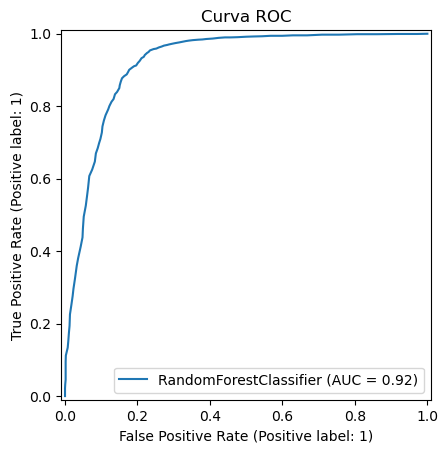

In [95]:
# Precisión (Accuracy)
accuracy = accuracy_score(y_test_encoded, y_pred) 
print(f"Precisión (Accuracy): {accuracy:.4f}")

# Recall (Sensibilidad)
recall = recall_score(y_test_encoded, y_pred)  
print(f"Recall (Sensibilidad): {recall:.4f}")

# Precisión Positiva (Precision)
precision = precision_score(y_test_encoded, y_pred)  
print(f"Precisión Positiva (Precision): {precision:.4f}")

# AUC-ROC
roc_auc = roc_auc_score(y_test_encoded, model.predict_proba(X_test)[:, 1]) 
print(f"AUC-ROC: {roc_auc:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred)  
print(f"Matriz de Confusión:\n{conf_matrix}")

# Graficar la curva ROC
RocCurveDisplay.from_estimator(model, X_test, y_test_encoded)  
plt.title('Curva ROC')
plt.show()


<h4>8. Resumen del Análisis de los Resultados del Modelo </h4>

El modelo Random Forest para clasificación utilizado para predecir la fidelización de clientes ha mostrado un rendimiento notable, con métricas clave que demuestran su capacidad para identificar clientes potenciales y mejorar las campañas de fidelización.
<br><br>
<h5>Evaluación del Rendimiento del Modelo:</h5>

<h5>Precisión (Accuracy):</h5> 85.88%. El modelo ha clasificado bien un alto porcentaje de los clientes, lo que indica una buena capacidad general para predecir la fidelización.

<h5>Recall (Sensibilidad):</h5> 88.28%. El modelo identifica correctamente a la mayoría de los clientes realmente interesados en productos de fidelización, reduciendo el riesgo de perder clientes potenciales.

<h5>Precisión Positiva (Precision):</h5> 83.00%. Un 83% de los clientes clasificados como interesados realmente lo están, lo que minimiza los falsos positivos.

<h5>AUC-ROC:</h5> 0.9211. El modelo tiene una gran capacidad para distinguir entre los clientes que aceptarán el producto y los que no, lo que lo hace muy efectivo en la toma de decisiones.

<h5>F1-Score:</h5> 0.8556. Un buen equilibrio entre la precisión y el recall, que refleja una capacidad equilibrada para identificar clientes potenciales sin sobrecargas por falsos positivos.

<h5>Matriz de Confusión:</h5> La matriz de confusión muestra que el modelo clasifica correctamente a la mayoría de los clientes, con 1475 verdaderos negativos y 1401 verdaderos positivos, y un número bajo de falsos negativos (287) y falsos positivos (186).
<br><br>
<h5>Relación con los Objetivos del Negocio:</h5>

<h5>Tasa de Conversión y Retención:</h5> Las altas métricas de precisión y recall aseguran que las campañas de fidelización se dirijan a los clientes correctos, mejorando la tasa de conversión y reduciendo el churn.
<h5>Aumento del CLV y NPS:</h5> La identificación de clientes potenciales ayuda a aumentar el valor de vida del cliente (CLV) y a mejorar el Net Promoter Score (NPS), lo que refleja una mayor satisfacción y fidelización.